# load in the survey results

limit to phd holding respondants - 13 responses

In [18]:
# Let's first read the uploaded CSV file to understand its structure and contents
import pandas as pd

# Load the CSV file
file_path = 'peptide digest master copy - Form Responses 2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Timestamp,Email Address,Please rate the following summary:\n\nSummary A Human,Please rate the following summary:\n\nSummary A Model,Please rate the following summary: \n\nSummary B Model,Please rate the following summary:\n\nSummary B Human,Please rate the following summary:\n\nSummary C Human,Please rate the following summary:\n\nSummary C Model,Please rate the following summary:\n\nSummary D Human,Please rate the following summary:\n\nSummary D Model,Please rate the following summary:\n\nSummary E Model,Please rate the following summary:\n\nSummary E Human,Please rate the following summary: \n\nSummary F Model,Please rate the following summary:\n\nSummary F Human,Please rate the following summary:\n\nSummary G Human,Please rate the following summary:\n\nSummary G Model,Please rate the following summary:\n\nSummary H Model,Please rate the following summary:\n\nSummary H Human,Please rate the following summary:\n\nSummary I Human,Please rate the following summary:\n\nSummary I Model
0,3/5/2024 17:56:23,jennifer.johnston@merck.com,3 - Average,5 - Excellent,4 - Good,5 - Excellent,4 - Good,5 - Excellent,NaN,NaN,5 - Excellent,5 - Excellent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/12/2024 13:38:49,dan.sindhikara@merck.com,2 - Fair,4 - Good,2 - Fair,3 - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/15/2024 13:06:13,li.xiao2@merck.com,1 - Poor,4 - Good,4 - Good,1 - Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/22/2024 11:53:22,jennifer.hickey@merck.com,2 - Fair,4 - Good,4 - Good,2 - Fair,1 - Poor,5 - Excellent,2 - Fair,4 - Good,4 - Good,3 - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/24/2024 15:27:01,abbas_walji@merck.com,4 - Good,5 - Excellent,4 - Good,2 - Fair,3 - Average,4 - Good,3 - Average,4 - Good,4 - Good,4 - Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate Confidence Interval

In [16]:
from scipy import stats

# Extract numerical ratings
for column in data.columns[2:]:  # Skipping the first two columns (Timestamp and Email Address)
    data[column] = data[column].str.extract('(\d)').astype(float)

# Calculate the average rating for each summary type (Human vs Model) for each summary (A-I)
average_ratings = data.iloc[:, 2:].mean().sort_index()


# Separate the ratings into two groups: Human and Model
human_ratings = data.filter(like='Human').melt()['value'].dropna()
model_ratings = data.filter(like='Model').melt()['value'].dropna()

# Calculate means and standard deviations
mean_human = human_ratings.mean()
mean_model = model_ratings.mean()
std_human = human_ratings.std(ddof=1)
std_model = model_ratings.std(ddof=1)
n_human = human_ratings.size
n_model = model_ratings.size

# Calculate the standard error for the difference in means
se_difference = np.sqrt((std_human**2 / n_human) + (std_model**2 / n_model))

# Calculate the degrees of freedom for Welch's t-test (since we can't assume equal variances)
df = (((std_human**2 / n_human) + (std_model**2 / n_model))**2) / (((std_human**2 / n_human)**2 / (n_human-1)) + ((std_model**2 / n_model)**2 / (n_model-1)))

# Calculate the t critical value for 95% confidence using the degrees of freedom
t_critical = stats.t.ppf(0.975, df)

# Calculate the confidence interval for the difference in means
margin_of_error = t_critical * se_difference
ci_lower = (mean_model - mean_human) - margin_of_error
ci_upper = (mean_model - mean_human) + margin_of_error

(mean_model - mean_human, ci_lower, ci_upper, t_critical)

(0.895833333333333, 0.5186090282161394, 1.2730576384505268, 1.9859491668698634)

 P value of 8.480299040050106e-06 at a 95% ci

In [17]:
# To calculate the p-value for the difference in means between human and model ratings, we'll perform a t-test.
# Since we're comparing two independent samples and can't assume equal variances, we'll use Welch's t-test.

# Calculate the t-statistic and p-value
t_stat, p_value = stats.ttest_ind(model_ratings, human_ratings, equal_var=False)

(t_stat, p_value)


(4.716237627993967, 8.480299040050106e-06)

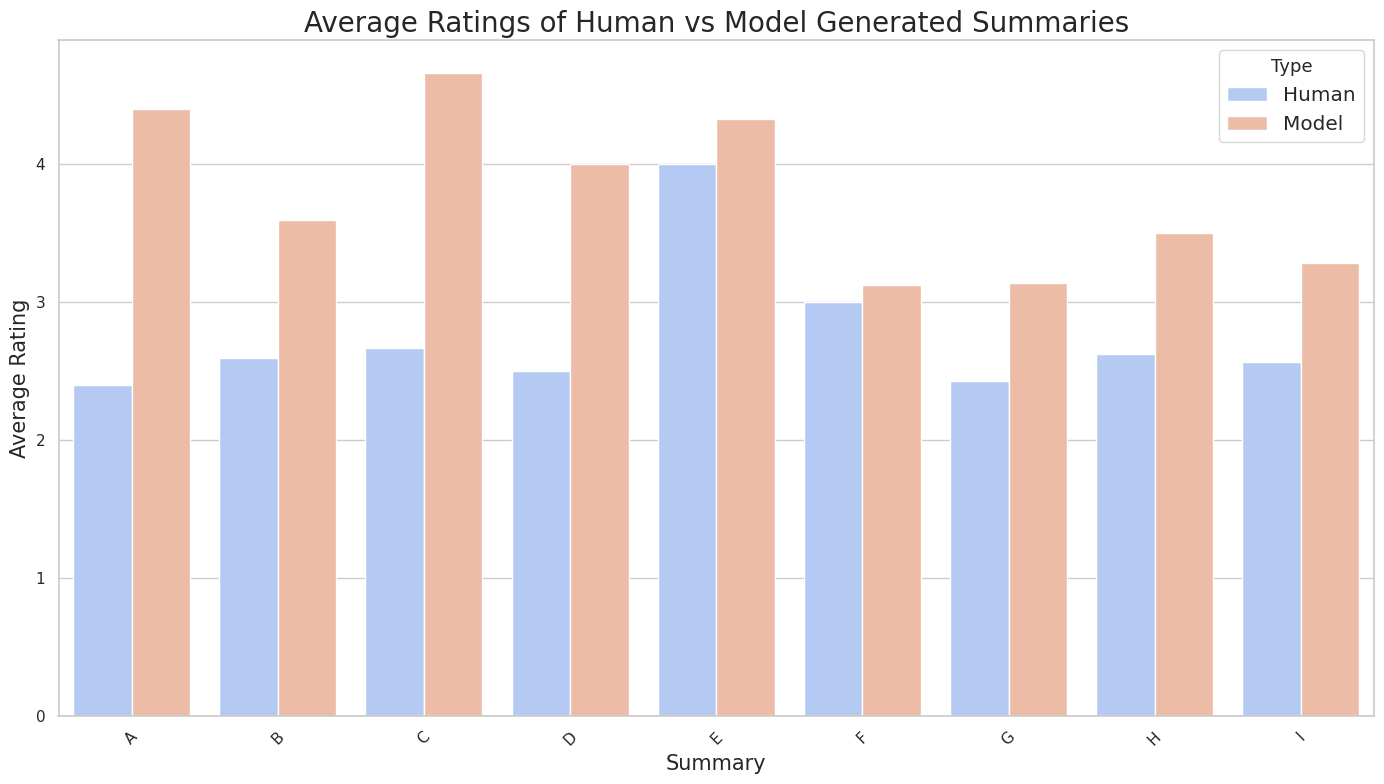

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the graphs
sns.set(style="whitegrid")

# Since the data contains paired comparisons (Human vs Model for each summary),
# it would be interesting to create a graph that clearly shows these comparisons.

# Prepare data for plotting
summaries = [label.split('\n\n')[1].split(' ')[1] for label in average_ratings.index]
types = ['Human' if 'Human' in label else 'Model' for label in average_ratings.index]
ratings = average_ratings.values

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Summary': summaries,
    'Type': types,
    'Average Rating': ratings
})

# Create a figure and axis for the plot
plt.figure(figsize=(14, 8))

# Plotting
sns.barplot(x='Summary', y='Average Rating', hue='Type', data=plot_data, palette='coolwarm')

# Adding labels and title
plt.title('Average Ratings of Human vs Model Generated Summaries', fontsize=20)
plt.xlabel('Summary', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Type', fontsize='large', title_fontsize='13')

plt.tight_layout()
plt.show()
